<div align="center">
    <h1>Taller de Computación Científica en Python - 2025</h1>
    <img src="https://www.iycr2014.org/__data/assets/image/0014/133052/logo_cenat.png" alt="Logo CENAT" style="width: 200px;"/>
    
</div>

---

## Manipulación de datos con Pandas

<center> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="image info" width="400"/> </center>

* Biblioteca diseñada para análisis y manipulación de datos.
* El nombre viene de **PANel DAta**, que es un término común para conjuntos de datos multidimensionales usualmente utilizados en estadística.
* Construida sobre NumPy.
* Implementa muchas operaciones de datos que pueden resultar familiares a usuarios de bases de datos o hojas de cálculo.

Pandas se importa como cualquier módulo ya visto.

---

**Realizado por:**  
Johansell Villalobos y Julián Sánchez

In [1]:
# celda para acceder a archivos en Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
import numpy as np
import pandas as pd #pd es una convención
pd.__version__

'2.1.4'

In [2]:
?pd

Type:        module
String form: <module 'pandas' from 'C:\\Users\\pelot\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\pandas\\__init__.py'>
File:        c:\users\pelot\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages\pandas\__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-----

* Los datos en Pandas se manejan a través de dos importantes objetos o estructuras: **Series** y **DataFrame**.
* Ambas estructuras pueden ser vistas como versiones *mejoradas* de estructuras NumPy.

# Series

* Una serie es un arreglo **unidimensional** de datos indexados.
* Los valores que se guardan en esta estructura tienen un índice, tal y como en el caso de las listas y los arreglos.
* La creación de una serie se basa en el comando:

```
pd.Series(estructura_de_datos,index=lista_de_indices)
```
## Series a partir de listas


In [3]:
a = [10,20.45,3,'cuatro',True,6.0]
b = [10, 1, 0, 1]

In [4]:
s1 = pd.Series(a) #El índice por defecto empezará en cero
s1

0        10
1     20.45
2         3
3    cuatro
4      True
5       6.0
dtype: object

In [5]:
s2 = pd.Series(b)
s2.values.dtype

dtype('int64')

Como se puede observar, una serie de Pandas engloba tanto a una secuencia de valores como una secuencia de índices.

In [6]:
s1.values #Tipo de dato, arreglos de NumPy

array([10, 20.45, 3, 'cuatro', True, 6.0], dtype=object)

In [7]:
s1.index

RangeIndex(start=0, stop=6, step=1)

## Series a partir de diccionarios

Si se usa un diccionario para construir la serie, las llaves se toman como índices y los valores los números de la serie.

In [8]:
dicc = {'a':1,
        'b':2,
        'c':3}

s2 = pd.Series(dicc)
s2

a    1
b    2
c    3
dtype: int64

In [9]:
s2.index

Index(['a', 'b', 'c'], dtype='object')

Con **index**, se puede cambiar el orden en que se insertan los datos en la serie.

In [10]:
s3 = pd.Series(dicc,index=['c','a','b'])
s3

c    3
a    1
b    2
dtype: int64

* Para acceder a un dato específico de la serie, hay que acceder al índice del mismo como con arreglos y listas.
* Al igual que con estas estructuras, a las series se les puede hacer *slicing*.

In [11]:
print(s3['b'], s3[2], s3[-1])

2 2 2


C:\Users\pelot\AppData\Local\Temp\ipykernel_20196\2793692485.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(s3['b'], s3[2], s3[-1])


**La diferencia entre un objeto Series de Pandas y un array de NumPy es la presencia de los índices.** En NumPy los índices están implícitamente definidos y son números enteros, en Pandas Series los índices se pueden definir además explícitamente.

En Pandas Series también podemos indexar y manipular como si se tratara de la estructura original.

In [12]:
codigos = pd.Series({'San José':1,'Alajuela':2,'Cartago':3,'Heredia':4}) #Creamos una serie a partir de un diccionario

In [13]:
codigos[1] == codigos["Alajuela"]

C:\Users\pelot\AppData\Local\Temp\ipykernel_20196\2836732920.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codigos[1] == codigos["Alajuela"]


True

In [14]:
'Guanacaste' not in codigos #Buscamos por índice

True

In [15]:
codigos.keys() #Imprimimos las claves del diccionario original

Index(['San José', 'Alajuela', 'Cartago', 'Heredia'], dtype='object')

In [16]:
list(codigos.items()) #Lista de elementos con los pares clave-valor del diccionario

[('San José', 1), ('Alajuela', 2), ('Cartago', 3), ('Heredia', 4)]

In [17]:
codigos['Guanacaste'] = 5 #Añadimos un nuevo elemento como en los diccionarios
codigos

San José      1
Alajuela      2
Cartago       3
Heredia       4
Guanacaste    5
dtype: int64

In [18]:
# tres maneras de crear una serie:
cantones = ["Canton 1", "Canton 2","Canton 3","Canton 4","Canton 5","Canton 6"]
datos = [1, 2, 3, 4, 5, 6]
codigos_cantones = {}

i = 0
for canton in cantones:
    codigos_cantones[canton] = datos[i]
    i += 1
serie = pd.Series(codigos_cantones)
print(serie)

for i, canton in enumerate(cantones):
    codigos_cantones[canton] = datos[i]
serie = pd.Series(codigos_cantones)
print(serie)

for dato, canton in zip(datos, cantones):
    codigos_cantones[canton] = dato

serie = pd.Series(codigos_cantones)
print(serie)

Canton 1    1
Canton 2    2
Canton 3    3
Canton 4    4
Canton 5    5
Canton 6    6
dtype: int64
Canton 1    1
Canton 2    2
Canton 3    3
Canton 4    4
Canton 5    5
Canton 6    6
dtype: int64
Canton 1    1
Canton 2    2
Canton 3    3
Canton 4    4
Canton 5    5
Canton 6    6
dtype: int64


## Filtrando datos por índice y a partir de condicionales

Podemos usar una "máscara" para encontrar ciertos elementos en nuestros datos.

In [19]:
mask = (codigos>2) & (codigos<=5) #Máscara, simplemente una condición
codigos[mask] #Devuelve los elementos de la serie que cumplen la condición

Cartago       3
Heredia       4
Guanacaste    5
dtype: int64

También podemos elegir los elementos por índice.

In [20]:
consulta = (codigos==1)

codigos[consulta]

San José    1
dtype: int64

In [21]:
codigos[1]

C:\Users\pelot\AppData\Local\Temp\ipykernel_20196\3221572382.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  codigos[1]


2

# DataFrame

* A grandes rasgos, el DataFrame es una tabla de datos.
* A diferencia de los *ndarrays* de NumPy, se pueden tener distintos tipos de datos **en las columnas**.
* Cada columna es un objeto de tipo Pandas Series.
* Las filas se identifican con un **índice** y las columnas con una **etiqueta**.

## Creando un DataFrame vacío

In [22]:
empt_df = pd.DataFrame()
empt_df

""


## DataFrame a partir de estructuras de datos

Los DataFrame se pueden crear también a partir de listas, diccionarios o incluso arreglos.

In [23]:
cod_df = pd.DataFrame(np.array([['San José',1],['Alajuela',2],['Cartago',3]])) #A partir de una lista
cod_df

,0,1
0,San José,1
1,Alajuela,2
2,Cartago,3


Cuando no se indican los nombres de las columnas ni los índices, las etiquetas por defecto serán números consecutivos empezando por 0, al igual que los índices.

In [24]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 

In [25]:
cod_df_dicc = pd.DataFrame({'Nombre':['San José','Alajuela','Cartago'],'Codigo':[1,2,3]}) #A partir de un diccionario
cod_df_dicc

,Nombre,Codigo
0,San José,1
1,Alajuela,2
2,Cartago,3


Creando el DataFrame de la forma anterior, obtenemos los nombres de las columnas a partir de las claves del diccionario.

## Asignando el nombre a las columnas y las filas

* Al crear el DataFrame, las etiquetas se pueden asignar usando el parámetro **columns**.
* Los índices también se pueden asignar con **index**.

In [26]:
cod_df_names = pd.DataFrame([['Heredia',4],['Guanacaste',5],['Puntarenas',6]],columns=['Nombre','Código'],index=['P1','P2','P3'])
cod_df_names

,Nombre,Código
P1,Heredia,4
P2,Guanacaste,5
P3,Puntarenas,6


**columns** e **index** son atributos que pueden ser cambiados incluso después de haber creado el DataFrame.

In [27]:
cod_df #No tenía nombres asignados en filas ni columnas

,0,1
0,San José,1
1,Alajuela,2
2,Cartago,3


In [28]:
cod_df.columns = ['Name','Code']
cod_df

,Name,Code
0,San José,1
1,Alajuela,2
2,Cartago,3


Además, podemos realizar operaciones con estos atributos, que devuelven estructuras iterables.

In [29]:
cod_df.index

RangeIndex(start=0, stop=3, step=1)

In [30]:
cod_df.index = ['P' + str(i) for i in cod_df.index]
cod_df

,Name,Code
P0,San José,1
P1,Alajuela,2
P2,Cartago,3


## DataFrames a partir de Series

In [31]:
s1 = pd.Series(['Carmen','Merced','Hospital'],index=[0,1,2])
s2 = pd.Series([10101,10102,10104],index=[0,1,3],dtype=object)
print(s1, '\n\n', s2)

0      Carmen
1      Merced
2    Hospital
dtype: object 

 0    10101
1    10102
3    10104
dtype: object


In [32]:
cod_distritos = pd.DataFrame({'Distrito':s1,'Código':s2})
cod_distritos['Distrito'][3] = "Centro"
cod_distritos['Código'][2] = 10103


In [33]:
cod_distritos

,Distrito,Código
0,Carmen,10101
1,Merced,10102
2,Hospital,10103
3,Centro,10104


Notemos que el índice donde se inserta el dato se respeta. Los datos faltantes se rellenan como valores **NaN** o *Not a Number*.

# Trabajando los datos con Pandas

## ¿Cómo cargar datos desde un archivo?

* Con Pandas se pueden cargar datos desde diversos tipos de archivos, incluyendo hojas de Microsoft Excel. Pueden consultar más [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).
* Se debe indicar el *path* o dirección del archivo, así como el delimitador de los datos o el nombre de la hoja en algunos casos.
* **read_csv()** es una función que permite cargar datos desde un archivo **.csv** y guardarlos en un objeto de Pandas.

Usaremos esta función para cargar un archivo con los datos de un estudio de detección de enfermedades del corazón en pacientes. Las variables que contiene este set de datos son:

* Edad.
* Sexo (H o M).
* Tipo de dolor de pecho (escala 0-3).
* Presión sanguínea en reposo.
* Colesterol sérico (en mg/dL).
* Niveles de azúcar en ayunas mayores a > 120 mg/dL (1 = Sí, 0 = No).
* Ritmo cardíaco máximo.
* Presencia de una enfermedad del corazón (escala 0-4).

In [34]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [130]:
import pandas as pd

# from google.colab import files
# uploaded = files.upload()

datosPacientes = pd.read_csv('pacientesCorazon.csv')
datosPacientes.head()

,63,H,3,145,233,1,150,0
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
4,57,H,0,140,192,0,148,0


* La primera fila es tomada como las etiquetas.
* En bases de datos donde no tenemos los nombres de las columnas en los archivos, el parámetro **names** nos permite asignar los nombres.  

In [131]:
nombres_columnas = ['edad', 'sexo', 'tipoDolor', 'presionReposo', 'colesterolSerico','azucarAyunas', 'latidosMax','presencia']

In [132]:
datosPacientesSN = pd.read_csv('pacientesCorazonSN.csv', names=nombres_columnas)
datosPacientesSN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


A veces los delimitadores son distintos, esto también debemos indicarlo.

In [133]:
datosPacientesPC = pd.read_csv('pacientesCorazonPC.csv') #Los datos no se leerán correctamente
datosPacientesPC

,edad;sexo;tipoDolor;presionReposo;colesterolSerico;azucarAyunas;latidosMax;presencia
0,63;H;3;145;233;1;150;0
1,37;H;2;130;250;0;187;2
2,41;M;1;130;204;0;172;1
3,56;H;1;120;236;0;178;0
4,57;M;0;120;354;0;163;0
...,...
298,57;M;0;140;241;0;123;1
299,45;H;3;110;264;0;132;2
300,68;H;0;144;193;1;141;3
301,57;H;0;130;131;0;115;1


In [134]:
datosPacientesPC = pd.read_csv('pacientesCorazonPC.csv',delimiter=';') #Los datos sí se leerán correctamente
datosPacientesPC

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


* Si no se desea usar la fila de encabezados, **header** es un parámetro que indica cuántas filas ocupan estos, por lo que se usa para omitir las etiquetas.
* Cuando header = None, las etiquetas serán números establecidos por defecto.

In [135]:
datosPacientesSN = pd.read_csv('pacientesCorazon.csv',header= None)
datosPacientesSN

,0,1,2,3,4,5,6,7
0,63,H,3,145,233,1,150,0
1,37,H,2,130,250,0,187,2
2,41,M,1,130,204,0,172,1
3,56,H,1,120,236,0,178,0
4,57,M,0,120,354,0,163,0
...,...,...,...,...,...,...,...,...
298,57,M,0,140,241,0,123,1
299,45,H,3,110,264,0,132,2
300,68,H,0,144,193,1,141,3
301,57,H,0,130,131,0,115,1


Como lo hacíamos con NumPy, también es posible omitir tantas filas como se quiera con el parámetro **skiprows**.

In [136]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

In [137]:
datosPacientesSN = pd.read_csv('pacientesCorazon.csv',header=None,skiprows=1)
datosPacientesSN

,0,1,2,3,4,5,6,7
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
4,57,H,0,140,192,0,148,0
...,...,...,...,...,...,...,...,...
297,57,M,0,140,241,0,123,1
298,45,H,3,110,264,0,132,2
299,68,H,0,144,193,1,141,3
300,57,H,0,130,131,0,115,1


## Funciones que "exploran" los datos

Pandas está ideado para el mandejo de bases de datos muy grandes, por lo que tiene algunas utilidades para su observación.

In [138]:
datosPacientes.head() #Imprime las 5 primeras filas del DataFrame

,63,H,3,145,233,1,150,0
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
4,57,H,0,140,192,0,148,0


In [139]:
datosPacientes.tail() #Imprime las 5 ultimas filas del DataFrame

,63,H,3,145,233,1,150,0
297,57,M,0,140,241,0,123,1
298,45,H,3,110,264,0,132,2
299,68,H,0,144,193,1,141,3
300,57,H,0,130,131,0,115,1
301,57,M,1,130,236,0,174,0


Por facilidad de lectura, las etiquetas se imprimen siempre.

También podemos "muestrear" a partir del DataFrame.

In [140]:
datosPacientes.sample(5) #Muestreo aleatorio, devuelve la cantidad de elementos solicitada

,63,H,3,145,233,1,150,0
77,52,H,1,128,205,1,184,0
138,64,H,0,128,263,0,105,0
75,51,H,2,125,245,1,166,1
42,53,M,0,130,264,0,143,0
74,55,M,1,135,250,0,161,0


## Modificación de los datos

### Renombramiento de columnas y Adición de filas y columnas

In [141]:
datosPacientes.columns = ['edad', 'sexo', 'tipoDolor', 'presionReposo', 'colesterolSerico','azucarAyunas', 'latidosMax','presencia']

In [142]:
datosPacientes['No.Seguro'] = pd.Series(np.random.random(303)*(1e9)) #Agrega una columna
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
0,37,H,2,130,250,0,187,2,2.918196e+08
1,41,M,1,130,204,0,172,1,3.003729e+08
2,56,H,1,120,236,0,178,0,5.548951e+08
3,57,M,0,120,354,0,163,0,1.171099e+08
4,57,H,0,140,192,0,148,0,5.772724e+08
...,...,...,...,...,...,...,...,...,...
297,57,M,0,140,241,0,123,1,1.800210e+08
298,45,H,3,110,264,0,132,2,2.758212e+08
299,68,H,0,144,193,1,141,3,9.158387e+08
300,57,H,0,130,131,0,115,1,9.290454e+07


La función **concat()** permite agregar filas, incluso otro DataFrame.

In [143]:
nuevoPaciente = pd.DataFrame(
    {'edad': [64],
     'sexo': ['M'],
     'tipoDolor': [2],
     'presionReposo': [120],
     'colesterolSerico': [325],
     'azucarAyunas': [0],
     'latidosMax': [175],
     'presencia': [1],
     'No.Seguro': [839082631]},
                              )

In [144]:
datosPacientes.concat([datosPacientes,nuevoPaciente],ignore_index=True) #Agrega el paciente al set de datos

datosPacientes.tail(1)

AttributeError: 'DataFrame' object has no attribute 'concat'

#### ¿Por qué no se añadió el nuevo paciente?

concat() es una función y no un atributo, por lo que es una función que concatena dos df, no un atributo que concatena un df a otro

In [145]:
datosPacientes = pd.concat([datosPacientes, nuevoPaciente],ignore_index=True, axis=0)
datosPacientes.tail()

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
298,45,H,3,110,264,0,132,2,2.758212e+08
299,68,H,0,144,193,1,141,3,9.158387e+08
300,57,H,0,130,131,0,115,1,9.290454e+07
301,57,M,1,130,236,0,174,0,2.832046e+08
302,64,M,2,120,325,0,175,1,8.390826e+08


Ahora agregaremos el registro de diez pacientes más como un DataFrame.

In [146]:
nuevosPacientes = pd.read_csv('nuevosPacientes.csv') #Base de datos con nuevos pacientes

datosPacientes = pd.concat([datosPacientes,nuevosPacientes],ignore_index=True)

f = pd.concat([datosPacientes, nuevosPacientes])

datosPacientes.tail(11)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
302,64,M,2,120,325,0,175,1,839082631.0
303,57,H,2,132,200,0,185,0,840275723.0
304,45,H,2,172,250,0,187,1,927504752.0
305,38,M,0,120,203,0,172,1,127509636.0
306,64,H,0,130,236,0,176,0,537434235.0
307,42,M,1,150,250,1,165,0,268743326.0
308,46,H,1,140,356,0,154,2,436732367.0
309,57,M,2,140,294,0,153,0,104763374.0
310,63,H,2,120,224,1,187,0,854702757.0
311,54,H,3,172,174,0,164,3,275983056.0


In [148]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]',
    *,
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names: 'list[HashableT] | None' = None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool | None' = None,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis.

Allows optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which ca

#### ¿Para qué es el parámetro **ignore_index**?

In [150]:
datosPacientes = pd.concat([datosPacientes,nuevosPacientes]) #Se conservan los índices del DataFrame agregado
print(datosPacientes.tail(20))

datosPacientes = pd.concat([datosPacientes,nuevosPacientes], ignore_index=True)#No se conservan los índices del DataFrame agregado

print(datosPacientes.tail(20))

     edad sexo  tipoDolor  presionReposo  colesterolSerico  azucarAyunas  \
303    57    H          2            132               200             0   
304    45    H          2            172               250             0   
305    38    M          0            120               203             0   
306    64    H          0            130               236             0   
307    42    M          1            150               250             1   
308    46    H          1            140               356             0   
309    57    M          2            140               294             0   
310    63    H          2            120               224             1   
311    54    H          3            172               174             0   
312    39    H          2            150               168             0   
0      57    H          2            132               200             0   
1      45    H          2            172               250             0   
2      38   

### Eliminación de filas y columnas

El comando **del** sirve para borrar columnas.

In [151]:
del datosPacientes['No.Seguro']
datosPacientes

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
4,57,H,0,140,192,0,148,0
...,...,...,...,...,...,...,...,...
328,46,H,1,140,356,0,154,2
329,57,M,2,140,294,0,153,0
330,63,H,2,120,224,1,187,0
331,54,H,3,172,174,0,164,3


La función **drop()** permite borrar filas y columnas.

In [152]:
datosPacientes = datosPacientes.drop([4]) #Borrará todo lo que está en el índice 0
datosPacientes.head(5)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
5,56,M,1,140,294,0,153,3


In [153]:
datosPacientes.tail(10)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
323,57,H,2,132,200,0,185,0
324,45,H,2,172,250,0,187,1
325,38,M,0,120,203,0,172,1
326,64,H,0,130,236,0,176,0
327,42,M,1,150,250,1,165,0
328,46,H,1,140,356,0,154,2
329,57,M,2,140,294,0,153,0
330,63,H,2,120,224,1,187,0
331,54,H,3,172,174,0,164,3
332,39,H,2,150,168,0,174,0


In [154]:
datosPacientes = datosPacientes.drop(['edad','sexo'], axis=1) #Borra las columnas indicadas, axis=1 implica columnas
datosPacientes

,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,2,130,250,0,187,2
1,1,130,204,0,172,1
2,1,120,236,0,178,0
3,0,120,354,0,163,0
5,1,140,294,0,153,3
...,...,...,...,...,...,...
328,1,140,356,0,154,2
329,2,140,294,0,153,0
330,2,120,224,1,187,0
331,3,172,174,0,164,3


## <font color='purple'>**Ejercicio**</font>

Con los datos que trabajó del modelo SIR, realice lo siguiente:

* Cargue los datos en un DataFrame de Pandas.
* Utilice algún método de los vistos para añadir los nombres a las columnas. Deberá nombrarlas "Susceptibles", "Infectados" y "Recuperados".
* Cree una columna adicional que corresponda al valor del tiempo. Use los valores de los datos de tiempo que obtuvo en la solución del ejercicio del modelo SIR con SciPy.
* Renombre los índices de su set de datos con "t=" y consecuentemente el número original del índice. Es decir, si el índice es 0, el nuevo índice será "t=0".
* Utilice una función de Pandas para observar los últimos datos que generó en la solución, ¿podría decirse que para el día 20 la enfermedad está controlada?

In [155]:
import pandas as pd

SIRnames = ["Susceptibles", "Infectados", "Recuperados"]
modelosir = pd.read_csv("modeloSIR.csv", names=SIRnames)

modelosir["tiempo"] = pd.Series(np.linspace(0, 240, num=100))

modelosir.index = ["t = " + str(i) for i in modelosir.index]
#print(modelosir.index)

modelosir.tail(20)

,Susceptibles,Infectados,Recuperados,tiempo
t = 80,0.005132,168.075178,1831.919690,193.939394
t = 81,0.004910,161.746115,1838.248975,196.363636
t = 82,0.004706,155.655941,1844.339353,198.787879
t = 83,0.004518,149.795595,1850.199887,201.212121
t = 84,0.004345,144.156300,1855.839354,203.636364
t = 85,0.004185,138.729565,1861.266250,206.060606
t = 86,0.004037,133.507181,1866.488782,208.484848
t = 87,0.003899,128.481227,1871.514875,210.909091
t = 88,0.003769,123.644062,1876.352169,213.333333
t = 89,0.003648,118.988363,1881.007989,215.757576


In [169]:
import pandas as pd
datosPacientes = pd.read_csv('pacientesCorazon.csv')
datosPacientes

datosPacientes.columns = ['edad', 'sexo', 'tipoDolor', 'presionReposo', 'colesterolSerico','azucarAyunas', 'latidosMax','presencia']

nuevosPacientes = pd.read_csv('nuevosPacientes.csv') #Base de datos con nuevos pacientes
datosPacientes = pd.concat([datosPacientes,nuevosPacientes],ignore_index=True)

In [170]:
datosPacientes.tail(20)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
292,67,H,2,152,212,0,150,2,NaN
293,44,H,0,120,169,0,144,1,NaN
294,63,H,0,140,187,0,144,0,NaN
295,63,M,0,124,197,0,136,3,NaN
296,59,H,0,164,176,1,90,1,NaN
297,57,M,0,140,241,0,123,1,NaN
298,45,H,3,110,264,0,132,2,NaN
299,68,H,0,144,193,1,141,3,NaN
300,57,H,0,130,131,0,115,1,NaN
301,57,M,1,130,236,0,174,0,NaN


## Localización de datos y selección de datos

* Las filas de un DataFrame pueden seleccionarse con un índice, al igual que con otras estructuras de datos.
* Las columnas se seleccionan con el nombre de la etiqueta y se indican como una lista.

In [171]:
datosPacientes[0:2] #Slicing por posición iniciando en 0 (indexación implícita)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
0,37,H,2,130,250,0,187,2,NaN
1,41,M,1,130,204,0,172,1,NaN


In [172]:
datosPacientes[0:2][['latidosMax','presencia']]


,latidosMax,presencia
0,187,2
1,172,1


Para evitar confusiones entre indexación implícita y explícita en el caso de los índices enteros, Pandas ofrece algunos atributos espaciales de indexación.

### loc

**loc** sirve para buscar en un DataFrame por etiqueta o por el índice de la columna index. Es decir, **loc** indexa y hace slicing referenciando a los **índices explícitos** de la estructura.

In [173]:
cod_df_names = pd.DataFrame([['Heredia',4],['Guanacaste',5],['Puntarenas',6]],columns=['Nombre','Código'],index=['P1','P2','P3'])
cod_df_names

,Nombre,Código
P1,Heredia,4
P2,Guanacaste,5
P3,Puntarenas,6


In [174]:
cod_df_names.loc['P2']

Nombre    Guanacaste
Código             5
Name: P2, dtype: object

In [175]:
datosPacientes.loc[1,'presionReposo'] #Busca filas cuyo índice sea 1 y la columna sea presionReposo

130

In [176]:
datosPacientes.loc[200:205,'presionReposo':] #Slicing con loc

,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
200,125,258,0,141,0,NaN
201,150,270,0,111,0,NaN
202,180,274,1,150,0,NaN
203,160,164,0,145,0,NaN
204,128,255,0,161,3,NaN
205,110,239,0,142,3,NaN


### iloc

Permite localizar las filas y las columnas por posición. Es decir, **iloc** indexa y hace slicing referenciando a los índices ímplicitos de la estructura usando indexación estilo Python.

In [177]:
datosPacientes.head(5)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
0,37,H,2,130,250,0,187,2,NaN
1,41,M,1,130,204,0,172,1,NaN
2,56,H,1,120,236,0,178,0,NaN
3,57,M,0,120,354,0,163,0,NaN
4,57,H,0,140,192,0,148,0,NaN


In [178]:
datosPacientes.iloc[0,0] #Devuelve el valor en la primera fila, primera columna

37

In [179]:
datosPacientes.iloc[0:3,0:4] #[filas, columnas]

,edad,sexo,tipoDolor,presionReposo
0,37,H,2,130
1,41,M,1,130
2,56,H,1,120


In [180]:
datosPacientes.head(5).iloc[-1] #Podemos usar la indexacion negativa como lo hacemos normalmente con Python

edad                 57
sexo                  H
tipoDolor             0
presionReposo       140
colesterolSerico    192
azucarAyunas          0
latidosMax          148
presencia             0
No.Seguro           NaN
Name: 4, dtype: object

Si analizamos el objeto que nos devuelve iloc, nos damos cuenta de que puede ser una serie.

In [181]:
isinstance(datosPacientes.iloc[3], pd.Series) #Es una serie

True

In [182]:
isinstance(datosPacientes.iloc[[3]], pd.Series) #Doble [] es un DataFrame

False

### Selección a través de condicionales

In [183]:
datosPacientes['presionReposo'] > 150 #Devuelve un listado de booleanos, evaluando en cada índice la condición

0      False
1      False
2      False
3      False
4      False
       ...  
307    False
308    False
309    False
310     True
311    False
Name: presionReposo, Length: 312, dtype: bool

Crearemos un DataFrame nuevo solamente con los pacientes con un nivel de azúcar en ayunas elevado (mayor que 120 mg/dL).

In [184]:
azucarAlta = datosPacientes[datosPacientes['azucarAyunas'] == 1] #Crea un nuevo DataFrame con las filas que cumplen esta condición
azucarAlta

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
7,52,H,2,172,199,1,162,2,NaN
13,58,M,3,150,283,1,162,0,NaN
22,61,H,2,150,243,1,137,3,NaN
25,59,H,2,150,212,1,157,0,NaN
27,65,M,2,140,417,1,157,0,NaN
28,53,H,2,130,197,1,152,3,NaN
35,54,M,2,135,304,1,170,3,NaN
59,71,M,2,110,265,1,130,2,NaN
63,58,H,2,140,211,1,165,2,NaN
75,51,H,2,125,245,1,166,1,NaN


Evaluemos además los casos con colesterol sérico alto (mayor a 200 mg/dL).

In [185]:
azCol = datosPacientes[(datosPacientes['azucarAyunas'] == 1) & (datosPacientes['colesterolSerico'] > 200)]
azCol

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
13,58,M,3,150,283,1,162,0,NaN
22,61,H,2,150,243,1,137,3,NaN
25,59,H,2,150,212,1,157,0,NaN
27,65,M,2,140,417,1,157,0,NaN
35,54,M,2,135,304,1,170,3,NaN
59,71,M,2,110,265,1,130,2,NaN
63,58,H,2,140,211,1,165,2,NaN
75,51,H,2,125,245,1,166,1,NaN
77,52,H,1,128,205,1,184,0,NaN
82,52,H,3,152,298,1,178,3,NaN


## <font color='purple'>**Ejercicio**</font>

* Localice las entradas con índice (explícito) 2.
* Del DataFrame que obtenga, borre la entrada del paciente con menor presión sanguínea en reposo.

In [186]:
datosPacientes.loc[2]
datosPacientes = datosPacientes.drop(2) # esto borra ambas, no encontré una manera de borrar solo una con lo visto

## Ordenando y uniendo sets de datos

### Ordenamiento

* **sort_values()** permite organizar los datos por columna.
* El parámetro **by** sirve para indicar las columnas por las cuales se quiere ordenar los datos.

In [187]:
datosPacientes.sort_values(by=['colesterolSerico']) #Ordena los datos de forma ascendente

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
110,57,H,2,150,126,1,173,1,NaN
300,57,H,0,130,131,0,115,1,NaN
52,44,M,2,108,141,0,175,0,NaN
150,71,M,0,112,149,0,125,0,NaN
266,49,H,2,118,149,0,126,2,NaN
...,...,...,...,...,...,...,...,...,...
95,62,M,0,140,394,0,157,2,NaN
219,63,M,0,150,407,0,154,0,NaN
245,56,M,0,134,409,0,150,2,NaN
27,65,M,2,140,417,1,157,0,NaN


In [188]:
datosPacientes.sort_values(by=['colesterolSerico'],ascending=False) #Ordena los datos de forma descendente

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
84,67,M,2,115,564,0,160,0,NaN
27,65,M,2,140,417,1,157,0,NaN
245,56,M,0,134,409,0,150,2,NaN
219,63,M,0,150,407,0,154,0,NaN
95,62,M,0,140,394,0,157,2,NaN
...,...,...,...,...,...,...,...,...,...
150,71,M,0,112,149,0,125,0,NaN
266,49,H,2,118,149,0,126,2,NaN
52,44,M,2,108,141,0,175,0,NaN
300,57,H,0,130,131,0,115,1,NaN


La segunda columna es el "criterio" para ordenar valores repetidos.

In [189]:
datosPacientes.sort_values(by=['colesterolSerico','latidosMax'],ascending=False)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia,No.Seguro
84,67,M,2,115,564,0,160,0,NaN
27,65,M,2,140,417,1,157,0,NaN
245,56,M,0,134,409,0,150,2,NaN
219,63,M,0,150,407,0,154,0,NaN
95,62,M,0,140,394,0,157,2,NaN
...,...,...,...,...,...,...,...,...,...
266,49,H,2,118,149,0,126,2,NaN
150,71,M,0,112,149,0,125,0,NaN
52,44,M,2,108,141,0,175,0,NaN
300,57,H,0,130,131,0,115,1,NaN


### Unión

Pandas, a través de la operación merge(), nos brinda la capacidad de manejar datos de forma relacional. Los tipos de unión que permite hacer Pandas tienen los siguientes criterios:

* Unión uno a uno
* Unión muchos a uno
* Unión muchos a muchos

#### Unión uno a uno

Es similar a realizar concatenación de columnas.


In [190]:
empleados = pd.DataFrame({'Empleado': ['Carlos', 'Daniel', 'Mónica', 'Karla', 'Ricardo'],
'Unidad': ['CNCA', 'LANOTEC', 'CENIBiot', 'FunCeNAT', 'CNCA']})
empleados


,Empleado,Unidad
0,Carlos,CNCA
1,Daniel,LANOTEC
2,Mónica,CENIBiot
3,Karla,FunCeNAT
4,Ricardo,CNCA


In [191]:
usuarios = pd.DataFrame({'Empleado': ['Daniel', 'Karla', 'Ricardo', 'Mónica','Carlos'],
'Matrícula': ['cr2004', 'cr2007', 'cr2007', 'cr2010','cr2018']})
usuarios

,Empleado,Matrícula
0,Daniel,cr2004
1,Karla,cr2007
2,Ricardo,cr2007
3,Mónica,cr2010
4,Carlos,cr2018


In [192]:
autosEmpleados = pd.merge(empleados, usuarios)
autosEmpleados

,Empleado,Unidad,Matrícula
0,Carlos,CNCA,cr2018
1,Daniel,LANOTEC,cr2004
2,Mónica,CENIBiot,cr2010
3,Karla,FunCeNAT,cr2007
4,Ricardo,CNCA,cr2007


* La función merge() reconoce que existe una columna igual en cada DataFrame y automáticamente la utiliza como llave para la unión.

* Noten que el orden de los registros no se mantiene y por lo general descarta el índice.

#### Unión muchos a uno

* Es el caso en el que la columna de referencia de uno de los DataFrame contenga valores duplicados.
* Para este tipo de unión, esos registros se van a mantener de manera apropiada.

In [193]:
jefes =  pd.DataFrame({'Jefe': ['Esteban', 'Jose', 'Randall', 'Cinthya'],
'Unidad': ['CNCA', 'LANOTEC', 'CENIBiot', 'FunCeNAT']})
jefes

,Jefe,Unidad
0,Esteban,CNCA
1,Jose,LANOTEC
2,Randall,CENIBiot
3,Cinthya,FunCeNAT


In [194]:
cenat = pd.merge(autosEmpleados, jefes)
cenat

,Empleado,Unidad,Matrícula,Jefe
0,Carlos,CNCA,cr2018,Esteban
1,Ricardo,CNCA,cr2007,Esteban
2,Daniel,LANOTEC,cr2004,Jose
3,Mónica,CENIBiot,cr2010,Randall
4,Karla,FunCeNAT,cr2007,Cinthya


#### Unión muchos a muchos

Es el caso en el que ambas columnas llave contengan valores duplicados.

In [195]:
habilidades = pd.DataFrame({'Unidad': ['FunCeNAT', 'FunCeNAT', 'CNCA', 'CNCA', 'LANOTEC', 'LANOTEC', 'CENIBiot','CENIBiot'],
'Habilidades': ['Administración', 'Hojas de cálculo', 'Coding', 'HPC', 'Nanotecnología',
           'Materiales', 'Análisis genómico', 'Bioinformática']})
habilidades

,Unidad,Habilidades
0,FunCeNAT,Administración
1,FunCeNAT,Hojas de cálculo
2,CNCA,Coding
3,CNCA,HPC
4,LANOTEC,Nanotecnología
5,LANOTEC,Materiales
6,CENIBiot,Análisis genómico
7,CENIBiot,Bioinformática


In [196]:
cenat = pd.merge(cenat,habilidades)
cenat

,Empleado,Unidad,Matrícula,Jefe,Habilidades
0,Carlos,CNCA,cr2018,Esteban,Coding
1,Carlos,CNCA,cr2018,Esteban,HPC
2,Ricardo,CNCA,cr2007,Esteban,Coding
3,Ricardo,CNCA,cr2007,Esteban,HPC
4,Daniel,LANOTEC,cr2004,Jose,Nanotecnología
5,Daniel,LANOTEC,cr2004,Jose,Materiales
6,Mónica,CENIBiot,cr2010,Randall,Análisis genómico
7,Mónica,CENIBiot,cr2010,Randall,Bioinformática
8,Karla,FunCeNAT,cr2007,Cinthya,Administración
9,Karla,FunCeNAT,cr2007,Cinthya,Hojas de cálculo


#### Otras funciones como **join()** y **concat()** también funcionan a la hora de unir datos. Se pueden consultar [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

## Manejo de datos faltantes

* En aplicaciones reales, tenemos que lidiar con conjuntos de datos que poseen múltiples datos faltantes.
* NaN es un valor especial de punto flotante definido en el standard IEEE.
* Normalmente se presentan problemas con estos valores, pues si operamos sobre ellos los resultados se verán afectados.

In [197]:
import numpy as np

In [198]:
1 + np.nan

nan

In [199]:
0*np.nan

nan

In [200]:
values = np.array([4, 5, np.nan, 7, 8])

print(values.sum(), values.min(), values.mean())

nan nan nan


## Operaciones con datos faltantes

info() nos devuelve información de cuántos son valores faltantes en nuestras columnas.

In [202]:
datosPacientesNan = pd.read_csv('pacientesCorazonNaN.csv')
datosPacientesNan

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
...,...,...,...,...,...,...,...,...
298,57.0,M,0.0,140.0,241.0,0.0,123.0,1
299,45.0,H,3.0,110.0,264.0,0.0,132.0,2
300,68.0,H,0.0,144.0,193.0,1.0,141.0,3
301,57.0,H,0.0,130.0,131.0,0.0,115.0,1


In [204]:
datosPacientesNan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              301 non-null    float64
 1   sexo              300 non-null    object 
 2   tipoDolor         297 non-null    float64
 3   presionReposo     291 non-null    float64
 4   colesterolSerico  292 non-null    float64
 5   azucarAyunas      300 non-null    float64
 6   latidosMax        296 non-null    float64
 7   presencia         303 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 19.1+ KB


### Eliminando datos faltantes

Los valores NaN no deben ser tomados en cuenta para hacer cálculos en Pandas. **dropna()** elimina las filas o las columnas donde existan datos faltantes. El parámetro **how** puede ser **any** o **all**, es decir, no es posible eliminar solo valores faltantes individualmente.

In [205]:
datosPacientesNan_drop = datosPacientesNan.dropna() #Por defecto, eliminará todas las filas donde exista un valor faltante
datosPacientesNan_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 0 to 302
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad              265 non-null    float64
 1   sexo              265 non-null    object 
 2   tipoDolor         265 non-null    float64
 3   presionReposo     265 non-null    float64
 4   colesterolSerico  265 non-null    float64
 5   azucarAyunas      265 non-null    float64
 6   latidosMax        265 non-null    float64
 7   presencia         265 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 18.6+ KB


In [206]:
datosPacientesNan_dropC = datosPacientesNan.dropna(axis='columns') #Por defecto, eliminará todas las columnas donde exista un valor faltante
datosPacientesNan_dropC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   presencia  303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [207]:
datosPacientesNan.dropna(how='any').head(20) #Borra la fila si al menos un valor en ella es NaN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


In [208]:
datosPacientesNan.dropna(how='all').head(20) #Borra la fila si todos los valores en ella son NaN

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


In [209]:
datosPacientesNan.dropna(axis='rows', thresh=7).head(20) #Especifica un mínimo de valores no nulos para conservar la fila o columna

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


**reset_index()** es una función que reinicia los índices empezando desde cero. Así podemos "limpiar" los índices de nuestro set de datos.

In [210]:
datosPacientesNan.dropna().reset_index().head(20)

,index,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


#### ¿Cómo identificar los elementos faltantes en una columna especifica?

isna() devuelve una lista de booleanos, resultado de evaluar la función en cada fila.

In [211]:
datosPacientesNan[:15]['presionReposo'].isna() #Indica los índices de la columna donde hay valores NaN

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13     True
14     True
Name: presionReposo, dtype: bool

### Rellenando datos faltantes

**fillna()** no elimina las filas, sino que sustituye el dato faltante con un dato deseado. El parámetro que recibe esta función es el dato con el que se rellenarán los NaN.

In [212]:
datosPacientesNan['presionReposo']= datosPacientesNan['presionReposo'].fillna('N/A')
datosPacientesNan.head(15)

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,63.0,H,3.0,145.0,233.0,1.0,150.0,0
1,37.0,H,2.0,130.0,250.0,0.0,187.0,2
2,41.0,M,1.0,130.0,204.0,0.0,172.0,1
3,56.0,H,1.0,120.0,236.0,0.0,178.0,0
4,57.0,M,0.0,120.0,354.0,0.0,163.0,0
5,57.0,H,0.0,140.0,192.0,0.0,148.0,0
6,56.0,M,1.0,140.0,294.0,0.0,153.0,3
7,44.0,H,1.0,120.0,263.0,0.0,173.0,0
8,52.0,H,2.0,172.0,199.0,1.0,162.0,2
9,57.0,H,2.0,150.0,168.0,0.0,174.0,1


## Operaciones de reducción y agrupamiento

### Reducción

Existen varias funciones que realizan cálculos básicos sobre los DataFrame, entre ellas están:

| Función | Resultado |
| :---: | :---: |
|sum()| Suma todos los datos|
|count()| Cuenta todos los datos|
|min()| Devuelve el valor mínimo|
|max()| Devuelve el valor máximo|
|mean()| Calcula la media de los datos|
|median()| Determina la mediana de los datos|

In [218]:
datosPacientes = pd.read_csv('pacientesCorazon.csv')
datosPacientes.columns = ['edad', 'sexo', 'tipoDolor', 'presionReposo', 'colesterolSerico','azucarAyunas', 'latidosMax','presencia']
datosPacientes



,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
0,37,H,2,130,250,0,187,2
1,41,M,1,130,204,0,172,1
2,56,H,1,120,236,0,178,0
3,57,M,0,120,354,0,163,0
4,57,H,0,140,192,0,148,0
...,...,...,...,...,...,...,...,...
297,57,M,0,140,241,0,123,1
298,45,H,3,110,264,0,132,2
299,68,H,0,144,193,1,141,3
300,57,H,0,130,131,0,115,1


In [219]:
datosPacientes.mean(numeric_only=True) #Media de los datos por columna

edad                 54.337748
tipoDolor             0.960265
presionReposo       131.579470
colesterolSerico    246.307947
azucarAyunas          0.145695
latidosMax          149.645695
presencia             0.940397
dtype: float64

In [220]:
datosPacientes['latidosMax'].median() #Mediana de los datos de una columna

153.0

In [221]:
datosPacientes['presencia'].mode() #Moda

0    0
Name: presencia, dtype: int64

El método describe() nos da una serie de estadísticos básicos de nuestro DataFrame.

In [222]:
datosPacientes.describe()

,edad,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.337748,0.960265,131.579470,246.307947,0.145695,149.645695,0.940397
std,9.083509,1.027080,17.550269,51.911129,0.353386,22.943169,1.229384
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.250000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,153.000000,0.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,166.000000,2.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,202.000000,4.000000


## <font color='purple'>**Ejercicio**</font>

Analice los resultados del modelo SIR, ¿cuándo se alcanzó el pico de la epidemia?

In [223]:
pico = modelosir["Infectados"].max()
modelosir.loc[modelosir["Infectados"] == pico] #el pico se alcanzó para t=21

,Susceptibles,Infectados,Recuperados,tiempo
t = 21,123.296292,1480.658707,396.045,50.909091


#### Histogramas y otros plots

Pandas posee métodos de ploteo muy básicos para analizar los datos de manera rápida. Podemos hacer:

* Histogramas.
* Gráficos de barras.
* Boxplots.
* Densidad (kde).
* Dispersión.
* Pastel.

<Axes: ylabel='Frequency'>

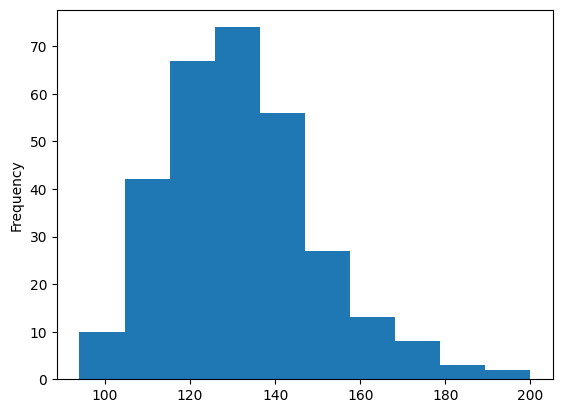

In [224]:
datosPacientes['presionReposo'].plot.hist()

<Axes: >

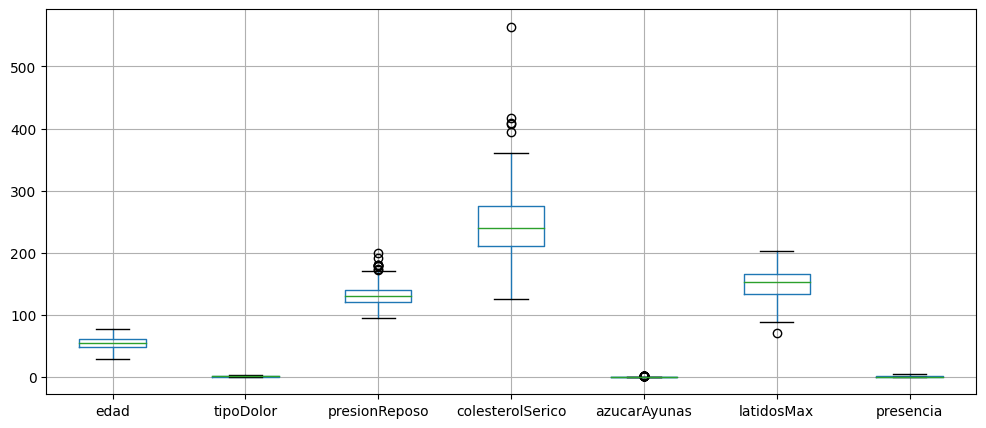

In [225]:
datosPacientes.boxplot(figsize=(12,5))

### Agrupamiento

* **groupby()** es un método que permite agrupar datos según un criterio.
* Una vez agrupados, el resultado se obtiene haciendo una operación de reducción.

Supongamos que queremos saber la edad promedio de las personas según cada tipo de dolor de pecho.

In [226]:
gruposDolor = datosPacientes.groupby(['tipoDolor'])
gruposDolor[['edad']].mean()

,edad
tipoDolor,
0,55.692308
1,51.360000
2,53.517241
3,55.545455


Veamos si hombres o mujeres tienden a tener el azúcar más alto en ayunas.

In [227]:
datosPacientes.groupby(['sexo'])[['azucarAyunas']].sum()

,azucarAyunas
sexo,
H,32
M,12


## <font color='purple'>**Con groupby(), ¿cómo averiguamos cuán propensa está una persona con nivel alto de azúcar a padecer una enfermedad del corazón?**</font>

In [228]:
a = datosPacientes.groupby(['azucarAyunas'])[['presencia']].mean()
a

,presencia
azucarAyunas,
0,0.899225
1,1.181818


# Guardando datos con Pandas

* **to_csv()** permite guardar los datos de un DataFrame en un archivo csv.
* Al igual que para leer los datos, se necesita indicar la dirección donde será guardado el archivo.
* Se puede elegir un delimitador, por defecto es ",".

In [229]:
datosPacientesO = datosPacientes[datosPacientes['presencia']==4]
datosPacientesO

,edad,sexo,tipoDolor,presionReposo,colesterolSerico,azucarAyunas,latidosMax,presencia
23,40,H,3,140,199,0,178,4
39,51,M,2,140,308,0,142,4
44,52,H,1,120,325,0,172,4
46,47,H,2,138,257,0,156,4
120,59,H,0,138,271,0,182,4
135,60,M,2,120,178,1,96,4
145,44,M,2,118,242,0,149,4
152,66,M,2,146,278,0,152,4
160,55,M,1,132,342,0,166,4
173,60,H,0,130,206,0,132,4


In [230]:
datosPacientesO.to_csv('pacientesO.csv',sep=';')

In [231]:
!cat pacientesO.csv

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [232]:
df = pd.DataFrame({
"A": [420, 380, 390], "B": [50, 40, 45] })
df["C"] = df["A"] + df["B"]
df

,A,B,C
0,420,50,470
1,380,40,420
2,390,45,435
